# COGORZA :  Prediction of BAC given a set of drinks

---
Source: A. Oliver (2021)

---

### Library import: 

+ numpy
+ pandas
+ matplotlib
+ Scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d


### Open Output file and write header

In [ ]:

f = open('BACPY.csv','w')
f.write('time,in_blood_alcohol,input_alcohol\n')

### Input parameter setting 

In [ ]:
# initial time of simulation
t0=0.
# Total number of hours to simulate
hsim = 24
# Final time of simulation
tfinal=3600 * hsim
# Integration time-step
dt = 1.
# Initial BAC
a0 = 0.
# Total number of drinks
N  = 12
# Volumes
shot = 25.
half_glass = 50.
cup = 200.
half=284.
bottle = 330.
pint = 473.2
liter = 1000.
# Alcoholic strenght of popular drinks
beer = 0.05
wine = 0.14
whiskey = 0.4
tequila = 0.5
absenta = 0.71
# Alcohol Absortion rate 
man = 0.10
woman = 0.12
Cabsor = man
# Body mass (kg)
M = 92.
# Density of alcohol (g/mL)
D = 0.789
# Amount of blood per unit mass (L/kg)
Cs=0.067
# Alcohol absorption time (it has a dependence with amount and kind of food in stomach) 
tabs= 20*60

### Input Drink properties

In [4]:
# Drink properties : v (drink volume) , g (strenght) 
# ti ("ith" drink start time since init time, in seconds)
# tf ("ith" drink finish time since init time, in seconds)
# tesp (Waiting time after finishing ith drink, in seconds)
# tconsum (amount of time required to end "ith" drink, equal to tf - ti, in seconds)

v=[]
g=[]
ti=[]
tf=[]
tesp=[]
a=[]
t=[]
b=[]

v.append(bottle)
g.append(beer)
ti.append(0*60)
tf.append(30*60)

v.append(bottle)
g.append(beer)
ti.append(60*60)
tf.append(80*60)

v.append(bottle)
g.append(beer)
ti.append(120*60)
tf.append(140*60)

v.append(bottle)
g.append(beer)
ti.append(160*60)
tf.append(200*60)

v.append(bottle)
g.append(beer)
ti.append(210*60)
tf.append(225*60)

v.append(bottle)
g.append(beer)
ti.append(260*60)
tf.append(280*60)

v.append(bottle)
g.append(beer)
ti.append(300*60)
tf.append(330*60)

v.append(bottle)
g.append(beer)
ti.append(335*60)
tf.append(380*60)

v.append(bottle)
g.append(beer)
ti.append(440*60)
tf.append(500*60)

v.append(bottle)
g.append(beer)
ti.append(510*60)
tf.append(520*60)

v.append(bottle)
g.append(beer)
ti.append(540*60)
tf.append(560*60)

v.append(bottle)
g.append(beer)
ti.append(570*60)
tf.append(600*60)

a.append(a0)
b.append(0)
aux=a0
bux=0
t=t0

# Equal condition loop for N drinks (uncomment to use it)

#for i in range(1,N):
#    v.append(lata)  
#    g.append(cerveza)
#    ti.append(0*60)
#    tf.append(30*60)


In [ ]:
# Integration of the proposed model

for i in range(0,tfinal-1):
    for j in range(0,N):
        st1=1
        st2=1
        if(t-ti[j]-tabs < 0) : st1 = 0
        if(t-tf[j]-tabs < 0) : st2 = 0
        aux=aux+D*v[j]*g[j]*Cabsor/(Cs*M*(tf[j]-ti[j]))*(st1-st2)*dt

        st1=1
        st2=1
        
        if(t-ti[j] < 0): st1 = 0
        if(t-tf[j] < 0): st2 = 0
        bux=bux+D*v[j]*g[j]*Cabsor*1000/(Cs*M*(tf[j]-ti[j]))*(st1-st2)*dt
        
    t=t+dt

    if(aux < 0):
        aux=0
    else: 
        aux=aux-0.12/3600.*dt

    if(aux < 0): 
        a.append(0)
    else:
        a.append(aux)
        
    b.append(bux)   
    if(np.mod(i,10)  == 0):  f.write(str(np.round(t/60,6))+","+str(np.round(a[i],6))+","+str(np.round(b[i],6))+'\n')
    bux=0

f.close()


### Read and plot graphical output

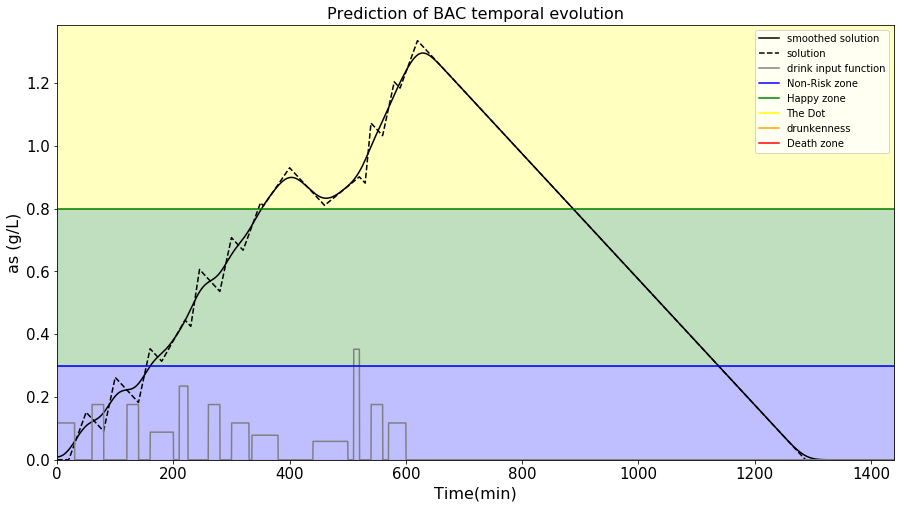

In [5]:
# Read Exported data as dataframe
at=pd.read_csv('BACPY.csv')

# Smooth the BAC curve
y=at['in_blood_alcohol']
y_smoothed = gaussian_filter1d(y, sigma=100)

# Graph options
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.figure(figsize = (15, 8))
plt.xlabel("Time(min)",fontsize=16)
plt.ylabel("as (g/L)",fontsize=16)
plt.title("Prediction of BAC temporal evolution",fontsize=16)
plt.xlim(0,at.loc[at.index[-1], 'time'])
plt.ylim(0,np.max(y)+0.05)

plt.plot(at['time'], y_smoothed,color='black',label='smoothed solution')
plt.plot(at['time'],at['in_blood_alcohol'], color='black', linestyle = '--', label='solution')
plt.plot(at['time'],at['input_alcohol'], color='grey',label='drink input function')

plt.axhline(y = 0.3, color = 'blue', linestyle = '-',label = "Non-Risk zone")
plt.fill_between(at['time'], 0.3, color='blue', alpha=0.25)
plt.axhline(y = 0.8, color = 'green', linestyle = '-',label = "Happy zone")
plt.fill_between(at['time'], 0.3, 0.8, color='green', alpha=0.25)
plt.axhline(y = 1.5, color = 'yellow', linestyle = '-',label = "The Dot")
plt.fill_between(at['time'], 0.8, 1.5, color='yellow', alpha=0.25)
plt.axhline(y = 3.0, color = 'orange', linestyle = '-',label = "drunkenness")
plt.fill_between(at['time'], 1.5, 3.0, color='orange', alpha=0.25)
plt.axhline(y = 5.0, color = 'red', linestyle = '-',label = "Death zone")
plt.fill_between(at['time'], 3.0, 5.0, color='red', alpha=0.25)

plt.legend(loc='upper right')
plt.savefig("Cogorza_BAC.png",dpi=200)
plt.show()
